<a href="https://colab.research.google.com/github/Shivanikatakam33/Shivani_INFO5731_Fall2024/blob/main/Katakam_Shivani_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [4]:
from google.colab import files
uploaded = files.upload()

Saving combined_research_papers.csv to combined_research_papers.csv


In [20]:
import os
# Checkingdirectory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)
print("\nFiles and Directories in Current Directory:")
print(os.listdir(current_directory))


Current Working Directory: /content

Files and Directories in Current Directory:
['.config', 'combined_research_papers.csv', 'sample_data']


In [23]:
import re
from collections import defaultdict, Counter
import pandas as pd
import nltk
# Loading dataset
file_path = './combined_research_papers.csv'  # Update with your file path
dataset = pd.read_csv(file_path)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
# cleaning text
def clean_text(text):
    text = text.lower()  # convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove non-alphanumeric characters
    return text
# generating n-grams
def generate_ngrams(text, n):
    words = text.split()
    ngrams = [tuple(words[i:i + n]) for i in range(len(words) - n + 1)]
    return ngrams
# Trigram Frequency Count
trigram_counts = defaultdict(int)
for abstract in dataset['abstract'].dropna():
    cleaned_text = clean_text(abstract)
    trigrams = generate_ngrams(cleaned_text, 3)
    for trigram in trigrams:
        trigram_counts[trigram] += 1
trigram_counts_sorted = sorted(trigram_counts.items(), key=lambda x: x[1], reverse=True)[:100]
print("Top 100 Trigrams:", trigram_counts_sorted)
# Bigram Probabilities
bigram_counts = defaultdict(int)
unigram_counts = defaultdict(int)
for abstract in dataset['abstract'].dropna():
    cleaned_text = clean_text(abstract)
    words = cleaned_text.split()
    if len(words) < 2:
        continue
    for i in range(len(words) - 1):
        bigram = (words[i], words[i + 1])
        bigram_counts[bigram] += 1
        unigram_counts[words[i]] += 1
    unigram_counts[words[-1]] += 1
# Calculating probabilities for each bigram
bigram_probabilities = {bigram: bigram_counts[bigram] / unigram_counts[bigram[0]]
                        for bigram in bigram_counts}
# probability results
bigram_probabilities_sorted = sorted(bigram_probabilities.items(), key=lambda x: x[1], reverse=True)[:100]
print("Top 100 Bigram Probabilities:", bigram_probabilities_sorted)
# Noun Phrase Extraction and Relative Probabilities
noun_phrase_counts = Counter()
def extract_noun_phrases(text):
    words = nltk.word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    noun_phrases = []
    current_phrase = []
    for word, pos in pos_tags:
        if pos.startswith('NN'):
            current_phrase.append(word)
        elif current_phrase:
            noun_phrases.append(" ".join(current_phrase))
            current_phrase = []
    if current_phrase:
        noun_phrases.append(" ".join(current_phrase))
    return noun_phrases
for abstract in dataset['abstract'].dropna():
    cleaned_text = clean_text(abstract)
    noun_phrases = extract_noun_phrases(cleaned_text)
    noun_phrase_counts.update(noun_phrases)
# Calculating relative probabilities
max_frequency = max(noun_phrase_counts.values())
relative_probabilities = {
    phrase: count / max_frequency for phrase, count in noun_phrase_counts.items()
}
# Display top noun phrases with relative probabilities
print("Top Noun Phrases with Relative Probabilities:")
for phrase, prob in sorted(relative_probabilities.items(), key=lambda x: x[1], reverse=True)[:100]:
    print(f"{phrase}: {prob:.2f}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Top 100 Trigrams: [(('in', 'this', 'paper'), 438), (('this', 'paper', 'we'), 360), (('as', 'well', 'as'), 349), (('of', 'machine', 'learning'), 315), (('of', 'artificial', 'intelligence'), 262), (('the', 'use', 'of'), 220), (('artificial', 'intelligence', 'ai'), 209), (('machine', 'learning', 'and'), 185), (('in', 'order', 'to'), 167), (('the', 'field', 'of'), 151), (('can', 'be', 'used'), 146), (('in', 'machine', 'learning'), 142), (('of', 'data', 'science'), 139), (('machine', 'learning', 'algorithms'), 138), (('a', 'set', 'of'), 138), (('the', 'development', 'of'), 137), (('a', 'variety', 'of'), 134), (('we', 'present', 'a'), 132), (('we', 'propose', 'a'), 125), (('we', 'show', 'that'), 124), (('in', 'terms', 'of'), 123), (('and', 'machine', 'learning'), 120), (('in', 'the', 'field'), 118), (('based', 'on', 'the'), 117), (('one', 'of', 'the'), 116), (('natural', 'language', 'processing'), 113), (('some', 'of', 'the'), 110), (('the', 'performance', 'of'), 105), (('that', 'can', 'be')

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [25]:
import math
import pandas as pd
from collections import defaultdict
# Loading dataset
file_path = './combined_research_papers.csv'
dataset = pd.read_csv(file_path)
def clean_text(text):
    text = text.lower()
    return re.sub(r'[^a-z\s]', '', text)
# Calculate Term Frequency
def calculate_tf(doc):
    tf = defaultdict(int)
    words = doc.split()
    for word in words:
        tf[word] += 1
    total_terms = len(words)
    for word in tf:
        tf[word] /= total_terms
    return tf
# Calculating Inverse Document Frequency
def calculate_idf(documents):
    idf = defaultdict(int)
    total_docs = len(documents)
    for doc in documents:
        unique_terms = set(doc.split())
        for term in unique_terms:
            idf[term] += 1
    for term in idf:
        idf[term] = math.log(total_docs / (1 + idf[term]))  # add 1 to avoid division by zero
    return idf
# Calculating TF-IDF for each document
documents = dataset['abstract'].dropna().apply(clean_text).tolist()  # list of cleaned abstracts
tf_list = [calculate_tf(doc) for doc in documents]
idf = calculate_idf(documents)
tf_idf_matrix = []
for tf in tf_list:
    tf_idf = {term: tf[term] * idf[term] for term in tf}
    tf_idf_matrix.append(tf_idf)
# Constructing query vector
query = "An Outstanding movie with a haunting performance and best character development"
query_cleaned = clean_text(query)
query_tf = calculate_tf(query_cleaned)
query_tf_idf = {term: query_tf[term] * idf.get(term, 0) for term in query_tf}
# Cosine Similarity calculation
def cosine_similarity(doc_vector, query_vector):
    dot_product = sum(doc_vector.get(term, 0) * query_vector.get(term, 0) for term in query_vector)
    doc_magnitude = math.sqrt(sum(val ** 2 for val in doc_vector.values()))
    query_magnitude = math.sqrt(sum(val ** 2 for val in query_vector.values()))
    if doc_magnitude == 0 or query_magnitude == 0:
        return 0
    return dot_product / (doc_magnitude * query_magnitude)
similarities = [cosine_similarity(doc_vector, query_tf_idf) for doc_vector in tf_idf_matrix]
# Ranking documents
ranked_docs = sorted(enumerate(similarities), key=lambda x: x[1], reverse=True)
top_ranked_docs = [(index, score) for index, score in ranked_docs[:100]]
print("Top 100 Documents ranked by similarity to query:")
for index, score in top_ranked_docs:
    print(f"Document {index+1} (Score: {score:.4f})")
    print(documents[index][:200], '...')
    print()

Top 100 Documents ranked by similarity to query:
Document 1094 (Score: 0.1948)
matrices of approximate low rank are pervasive in data science appearing in movie preferences text documents survey data medical records and genomics while there is a vast literature on how ...

Document 31 (Score: 0.1646)
in this issue best of the web presents the modified national institute of standards and technology mnist resources consisting of a collection of handwritten digit images used extensively in optical ch ...

Document 623 (Score: 0.1537)
we study the problem of learning to accurately rank a set of objects by combining a given collection of ranking or preference functions this problem of combining preferences arises in several applicat ...

Document 1250 (Score: 0.1333)
netflix released a dataset containing  million anonymous movie ratings and challenged the data mining machine learning and computer science communities to develop systems that could beat the accuracy  ...

Document 20 (Score: 0

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


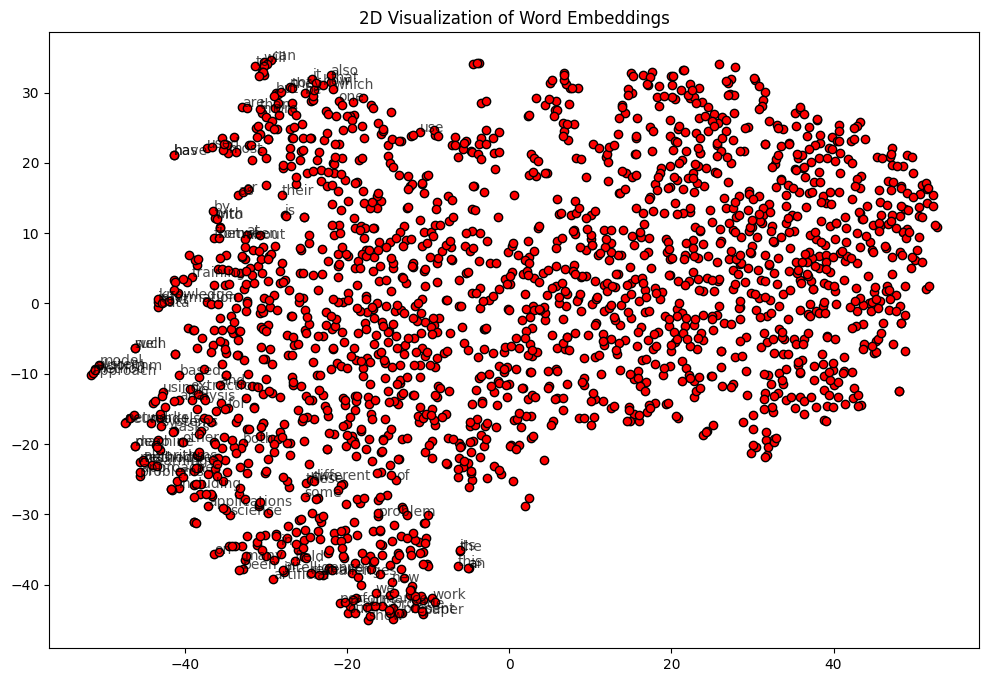

In [27]:
import pandas as pd
import re
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import nltk
# Loading dataset
file_path = './combined_research_papers.csv'  # Update with your file path
dataset = pd.read_csv(file_path)
nltk.download('punkt')
# Text Cleaning
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text
# Preparing data for Word2Vec model
documents = dataset['abstract'].dropna().apply(clean_text).tolist()
tokenized_documents = [nltk.word_tokenize(doc) for doc in documents]
# Train a Word2Vec Model with 300 Dimensions
embedding_dim = 300
word2vec_model = Word2Vec(sentences=tokenized_documents, vector_size=embedding_dim, window=5, min_count=2, workers=4)
# Visualize Word Embeddings
words = list(word2vec_model.wv.index_to_key)
word_vectors = word2vec_model.wv[words]
tsne = TSNE(n_components=2, random_state=0)
word_vectors_2d = tsne.fit_transform(word_vectors[:2000])
# Plotting the words
plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], edgecolors='k', c='r')
for i, word in enumerate(words[:100]):  # Annotate only first 100 words
    plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]), alpha=0.7)
plt.title("2D Visualization of Word Embeddings")
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


https://github.com/Shivanikatakam33/Shivani_INFO5731_Fall2024/blob/main/INFO5731%20Assignment%2003.csv

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
this assignemnt really took so much time. i learned many concepts in depth.